In [1]:
import re, os, glob, pandas as pd
import editdistance

In [3]:
## Import token totals
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
token_totals = pd.read_csv('tokens_year.csv')

## Import Master DF
os.chdir("C://Users//Ruben//Documents//Scriptie//Data//unigrams//output//years")
df = pd.read_csv('total-unigrams.csv')

## Define ED function
def GetCloseED(master_df, search_term):
    output_list = list()
    
    subset_df = master_df[master_df.ngram.str[0] == search_term[0]]
    
    for word in list(subset_df.ngram):
        ed = editdistance.eval(search_term, word)
        if ed < 3 and len(word) <= len(search_term):
            output_list.append(word)
    
    return output_list

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


_Extract Unigrams_

In [4]:
df_buit = df[df.ngram.isin(GetCloseED(df, "buitenlanden"))]
df_buit = df_buit.reset_index(drop=True)
df_buit = df_buit.dropna()
df_buit['year'] = df_buit['year'].astype(int)
df_buit = df_buit.pivot(index='ngram', columns='year', values='count')
df_buit = df_buit.fillna(0)
df_buit.columns = df_buit.columns.astype(str)

In [12]:
df_buit = df_buit[df_buit.index.isin(['buitenlanden', 'buytenlanden', 'buijtenlanden','botenlanden', 'btutenlanden', 'buienlande', 'buifenlanden', 'buifenlanden', 'buitcenlandei', 'buitenlauden', 'buitenlauden', 'bultonlanden'])]

In [13]:
list_sums = list()

for i in list(df_buit.columns):
    tmp = sum(df_buit[i].astype(int))
    list_sums.append(tmp)

In [17]:
token_totals['buitenlanden'] = list_sums
token_totals['buitenlanden'] = token_totals['buitenlanden'] / token_totals['tokens'] * 100

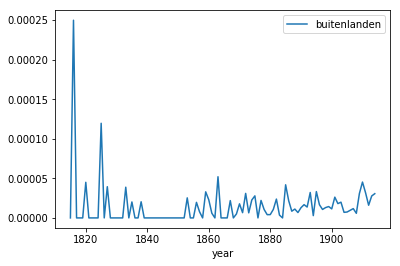

In [18]:
plot = token_totals.plot.line(x='year', y='buitenlanden')

In [82]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
token_totals.to_csv("unigrams_buitenlandsche.csv")

In [83]:
df_buit.to_csv('raw_ocr_alt_buitenlandsche.csv')

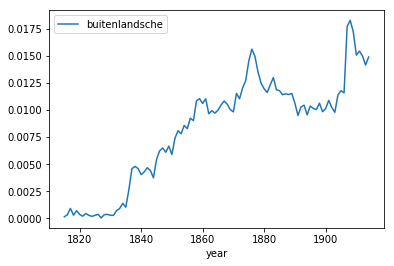

In [84]:
## Get 'Buitenland'
df_buit = df[df.ngram.isin(GetCloseED(df, "buitenland"))]
df_buit = df_buit[df_buit.ngram.str.len() == 10]
df_buit = df_buit.reset_index(drop=True)
df_buit = df_buit.dropna()
df_buit['year'] = df_buit['year'].astype(int)
df_buit = df_buit.pivot(index='ngram', columns='year', values='count')
df_buit = df_buit.fillna(0)
df_buit.columns = df_buit.columns.astype(str)
list_sums = list()

for i in list(df_buit.columns):
    tmp = sum(df_buit[i].astype(int))
    list_sums.append(tmp)

token_totals['buitenlandsche'] = list_sums
token_totals['buitenlandsche'] = token_totals['buitenlandsche'] / token_totals['tokens'] * 100
plot = token_totals.plot.line(x='year', y='buitenlandsche')

In [85]:
df_buit.to_csv('raw_ocr_alt_buitenland.csv')

In [86]:
df_buit.to_csv("unigrams_buitenland.csv")